Assignment 1 - Introduction to Computational Biology Labs

Rianne van Drimmelen (11073209)
Joaquim Ferrer (12278327)

Introduction

In this assignment, we aim to solve several differential equations. 
To do so, we will be using Python 3. 

1. Bacterial Growth

First we examined the growth of the bacterial density in a petri dish. By integrating the function dx/dt=Cx, we find the growth equation and knowing the initial density of 10/ml and that it takes 20 hours for this density to double, we calculate constant C. Subsequently, we examine the time it takes for the density, to increase to 8 times, and ten times its original value by setting the equation equal to 80/ml and 100/ml and solving the equation for t.

In [28]:
from sympy import Symbol, Function
from sympy import integrate
from sympy import *

C, t, C1 = symbols("C t C1")
x = Function("x")

diffeq = Eq(x(t).diff(t), C*x(t))
sol = dsolve(diffeq, x(t)).rhs

conditions = (sol.subs(t, 0) - 10, sol.subs(t, 20) - 20)
solutions = nonlinsolve(conditions, (C, C1))

real_sol = list(solutions)[0]
print(real_sol)

(log(2)/20, 10)


In [30]:
eq8 = Eq(80, 10*exp((log(2)/20)*t))
sol8 = solve(eq8, t)
print(sol8)

eq10 = Eq(100, 10*exp((log(2)/20)*t))
sol10 = solve(eq10, t)
print(sol10)

[60]
[20*log(10)/log(2)]


2. Fitting linear or exponential to growth data

In this part, we aimed to fit a given dataset to a function. We first examined the dataset, to decide what better describes the data, linear or exponential growth. This is done by fitting the data to several functions, plotting them, and finding the error of both fits. 

In [31]:
my_data = [[0.5,1.27],[0.6,6.58],[0.7,7.00],[0.8,8.83],[0.9,8.66],[1.0,5.53],[1.1,9.33],[1.2,14.57],[1.3,8.51],[1.4,17.61],[1.5,12.94],[1.6,18.45],[1.7,19.85],[1.8,25.03],[1.9,28.14],[2.0,28.31],[2.1,33.41],[2.2,41.43],[2.3,40.87],[2.4,56.71],[2.5,59.32]]

my_data_x = [a for a,b in my_data]
my_data_y = [b for a,b in my_data]

In [32]:
import numpy as np

max_degree = 4
fitted_funcs = [np.poly1d(np.polyfit(my_data_x, my_data_y, i)) for i in range(1, max_degree)]

for fitted_func in fitted_funcs:
    print(fitted_func.c)

preds = [fitted_func(my_data_x) for fitted_func in fitted_funcs]

[ 24.97883117 -15.92777056]
[ 16.01095129 -23.0540227   14.2261877 ]
[ 10.16326499 -29.72374117  38.86058762 -10.0436891 ]


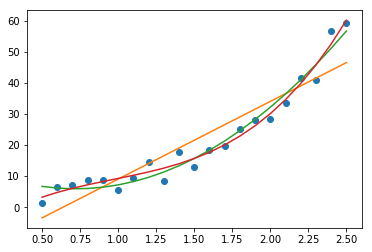

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(my_data_x, my_data_y, 'o')
for i_f, fitted_func in enumerate(fitted_funcs):
    plt.plot(my_data_x, preds[i_f])

The data fits much better with a second order polynomial than with a first order polynomial. Therefore, whatever it represents, grows exponentially.

We chose the degree of the polynomial to be 2, because it fits the data well enough. Obviously, as we increase the degree, we will find better fits (even a curve that completely fits the data), but we assume the data is noisy, and a high degree will overfit.

Do we assume the data is noisy? We can fit it perfectly with degree = 100.

In [34]:
chosen_degree = 2
fitted_func = fitted_funcs[chosen_degree -1]
print("Coefficients of the polynomial which is the derivative of the fitted function", fitted_func.deriv().c) #Coefficients of the derivative. The corresponding degrees are in decreasing order but check

Coefficients of the polynomial which is the derivative of the fitted function [ 32.02190258 -23.0540227 ]


In [35]:
mean_absolute_error = sum([abs(fitted_func(my_data_x[i]) - my_data_y[i]) for i in range(len(my_data_x))])/len(my_data_x)
print("The mean absolute error of the fitted function is ", mean_absolute_error)

The mean absolute error of the fitted function is  2.481068373927475


In [ ]:
################ We need the error of both fits.

3. The SIR model - Seasonal epidemics

The SIR model can be used to study how the probability of getting a disease varies with the seasons of the year. We examined how the fractions of susceptible (S), infective (I), and recovered (R) individuals in the populations change over time by varying the death rate, recovery rate, season length, initial infections rate and the amount of initially infected and plotting them.

In [45]:
S = Function("S")
I = Function("I")
R = Function("R")
Beta = Function("Beta")

beta_0, S_0, I_0, R_0 = symbols("beta_0 S_0 I_0 R_0")

mu, gamma, t, T = symbols("mu gamma t T")

S_eq = Eq(S(t).diff(t), mu - mu*S(t) - Beta(t) * I(t) * S(t))
I_eq = Eq(I(t).diff(t), Beta(t)*I(t)*S(t) - (gamma + mu)*I(t))
R_eq = Eq(R(t).diff(t), gamma*I(t) - mu*R(t))

reproduction_rate = integrate(Beta(t)/(mu + gamma), (t, 0, T)) / T

Beta = beta_0 * (1+ sin(2*pi*t/T))

In [46]:
S = dsolve(S_eq).rhs
I = dsolve(I_eq).rhs
R = dsolve(R_eq).rhs

In [49]:
d = [(mu, 0.5),(gamma, 0.5),(T, 15)]

S = S.subs(d)
I = I.subs(d)
R = R.subs(d)